# Đường viền trong OpenCV

## Mục tiêu

Trong hướng dẫn này, bạn sẽ học cách:

- Sử dụng hàm OpenCV `findContours()`
- Sử dụng hàm OpenCV `drawContours()`

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

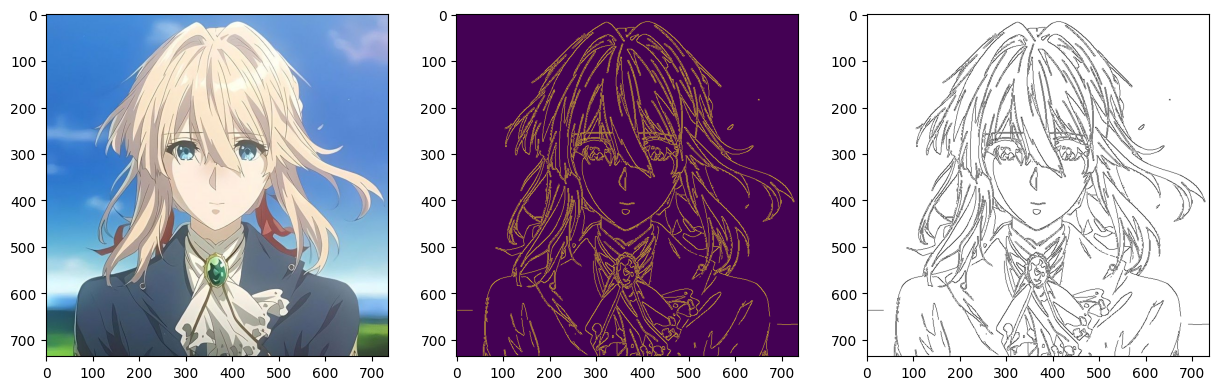

In [3]:
# Đọc ảnh
image_brg = cv2.imread("images/violet.jpg", cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_brg, cv2.COLOR_BGR2RGB)
image_gray= cv2.cvtColor(image_brg, cv2.COLOR_BGR2GRAY)

# Làm rõ cạnh
image_canny = cv2.Canny(image_gray, 100, 150)

# Tìm tọa độ cạnh (contours)
contours, hierarchy = cv2.findContours(image_canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Tạo ảnh trắng
white_image = np.ones(image_rgb.shape, dtype=np.uint8) * 255

# Thể hiện lên ảnh
cv2.drawContours(white_image, contours, -1, (0, 0, 0))

# Hiển thị
plt.figure(figsize=[15, 5])
plt.subplot(131); plt.imshow(image_rgb)
plt.subplot(132); plt.imshow(image_canny)
plt.subplot(133); plt.imshow(white_image)


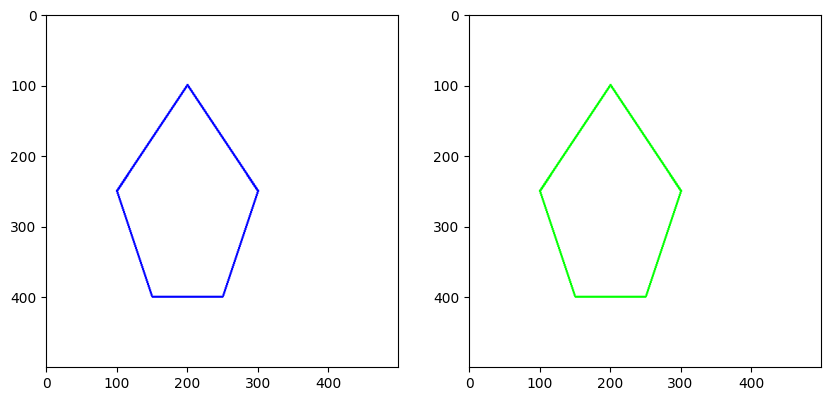

In [6]:
# Tạo ảnh trắng
img1 = np.ones((500, 500, 3), dtype=np.uint8) * 255
img2 = img1.copy()
# Tạo vài điểm dạng ngôi sao
pts = np.array([[100,250], [200,100], [300,250], [250,400], [150,400]], np.int32)
pts = pts.reshape((-1,1,2))

# Vẽ contour ban đầu (nối các điểm)
cv2.polylines(img1, [pts], isClosed=True, color=(0,0,255), thickness=2)

# Tính convex hull
hull = cv2.convexHull(pts)

# Vẽ convex hull
cv2.polylines(img2, [hull], isClosed=True, color=(0,255,0), thickness=2)

# Hiển thị
plt.figure(figsize=[10, 5])
plt.subplot(121); plt.imshow(img1)
plt.subplot(122); plt.imshow(img2)